In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from msd.SpeakerDiarizer import SpeakerDiarizer

In [3]:
diarizer = SpeakerDiarizer(name_pipe='dia')

Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/features/pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master


In [4]:
path='data/martin2.wav'

In [5]:
diarizer.apply_diarizer(path)

/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


In [7]:
diarizer.write_rttm(path_outputs='outputs/martin2.rttm')

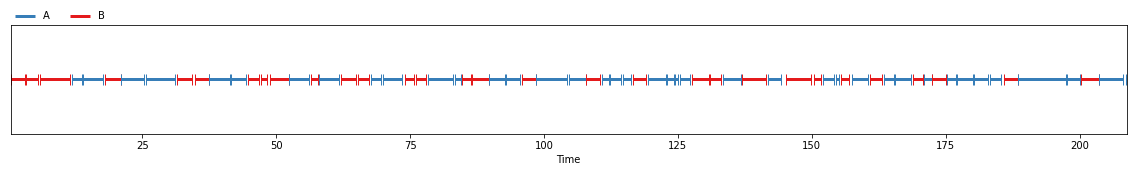

In [6]:
diarizer.diarization

In [8]:
diarizer.print_outputs()

Speaker "B" speaks between t=0.4s and t=3.1s.
Speaker "B" speaks between t=3.4s and t=5.5s.
Speaker "B" speaks between t=5.9s and t=11.6s.
Speaker "A" speaks between t=11.9s and t=13.7s.
Speaker "A" speaks between t=14.0s and t=17.6s.
Speaker "B" speaks between t=18.0s and t=21.0s.
Speaker "A" speaks between t=21.0s and t=25.4s.
Speaker "A" speaks between t=25.7s and t=31.2s.
Speaker "B" speaks between t=31.4s and t=34.3s.
Speaker "B" speaks between t=34.8s and t=37.4s.
Speaker "A" speaks between t=37.4s and t=41.3s.
Speaker "A" speaks between t=41.6s and t=44.4s.
Speaker "B" speaks between t=44.7s and t=46.7s.
Speaker "B" speaks between t=47.2s and t=48.3s.
Speaker "B" speaks between t=48.9s and t=52.4s.
Speaker "A" speaks between t=52.4s and t=56.1s.
Speaker "B" speaks between t=56.5s and t=57.7s.
Speaker "A" speaks between t=58.0s and t=61.7s.
Speaker "B" speaks between t=62.1s and t=64.8s.
Speaker "B" speaks between t=65.3s and t=67.4s.
Speaker "A" speaks between t=67.7s and t=69.6

In [18]:
diarizer.score('outputs/groundtruth/martin2_gt.rttm')

{'correct': 178.08065624999995, 'false alarm': 3.3476249999999856, 'confusion': 7.154906249999961, 'missed detection': 7.514437500000156, 'total': 192.75000000000006, 'diarization error rate': 0.09347324902723786}


In [21]:
from msd.SpeakerAward import SpeakerAward

In [22]:
award = SpeakerAward(diarizer)

In [27]:
diarizer.current_filename

'data/martin2.wav'

In [90]:
json_outputs = award.get_json()
json_outputs

'[{"speaker": "B", "start": "00:00:00", "end": "00:00:03", "text": "It was this observation that drew from Douglas."}, {"speaker": "B", "start": "00:00:03", "end": "00:00:05", "text": "Not immediately, but later in the evening."}, {"speaker": "B", "start": "00:00:05", "end": "00:00:11", "text": "Reply that had the interesting consequences to which I call attention. He wore blue silk stockings."}, {"speaker": "A", "start": "00:00:11", "end": "00:00:13", "text": "Blue knee pants with gold buckles."}, {"speaker": "A", "start": "00:00:14", "end": "00:00:17", "text": "A blue ruffled waist and a jacket of bright blue braided with gold."}, {"speaker": "B", "start": "00:00:18", "end": "00:00:21", "text": "Someone else told a story not particularly effective."}, {"speaker": "A", "start": "00:00:21", "end": "00:00:25", "text": "Which I saw he was not following. His hat had a peak crown at a flat brim."}, {"speaker": "A", "start": "00:00:25", "end": "00:00:31", "text": "And around the brim with a